In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.fftpack import fft,ifft
from scipy.io import wavfile
from scipy.signal import spectrogram
import IPython
% matplotlib inline

# Récupération du signal audio

In [2]:
Fs,X = wavfile.read('data/a_montant.wav')
X = np.float64(X)
T = len(X)
print(Fs)
# spectrogramme 
Nfft = 2**10
f,t,spec = spectrogram(X,nfft=Nfft)

8000


C:\Users\Amaury\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


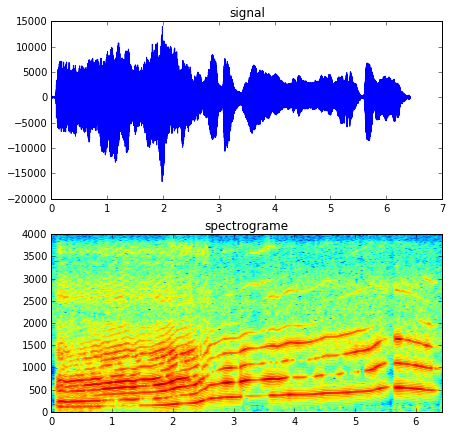

In [3]:
f,ax = plt.subplots(2,1,figsize=(7,7))
ax[0].plot(np.arange(T)/Fs,X)
ax[0].set_title("signal")
ax[1].imshow(20*np.log10(spec[0:Nfft/2,:]),origin="lower", aspect="auto",extent=[0,(T-1)/Fs,0,Fs/2])
ax[1].set_title("spectrograme")

IPython.display.Audio(X, rate=Fs)

# Estimateur

In [4]:
def generation_est(X, d, T, mu):

    theta_est = np.matrix(np.zeros((d,T)))
    X_est = np.zeros(T)
    err = np.zeros(T)
        
    for k in (np.arange(d,T)): # on fait T itérations
        XX = X[k-d:k][::-1]
        
        theta_est[:,k] = np.matrix(theta_est[:,k-1].T + mu * (X[k] - np.dot(XX, theta_est[:,k-1])) * XX / (1 + mu * norm(XX) ** 2)).T  

        X_est[k] = np.dot(XX, theta_est[:,k])
        current_err = X[k]-X_est[k]
        err[k] = current_err
        
    return X_est, theta_est,err

In [5]:
mu = 0.01
d = 20
X_est, theta_est,err = generation_est(X, d, T, mu)

# Analyse spectrale

In [6]:
def dsp(theta, T, N = 512):
    dsp_array = np.matrix(np.zeros((N, T)))
    
    for t in np.arange(T):
        dsp_array[:,t] = np.matrix(1./abs(fft(theta[:,t].T, N)) ** 2).T
        
    lambd = np.arange(N, dtype = 'double')/N
        
    return lambd, dsp_array

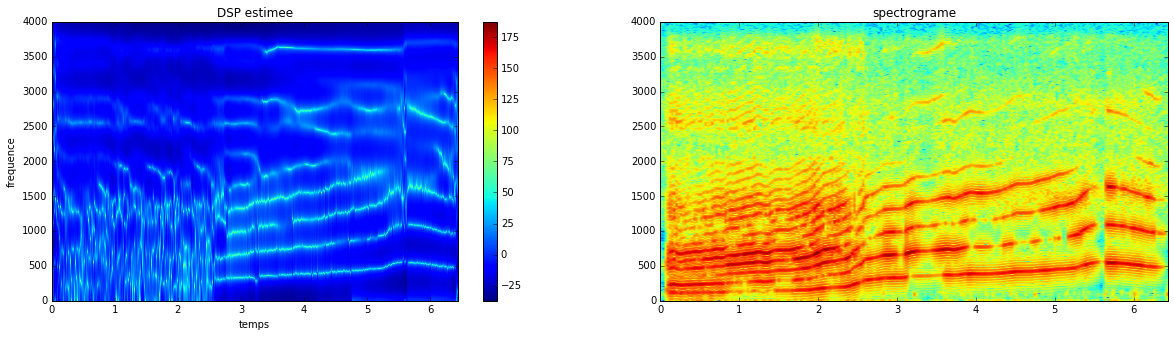

In [7]:
coeffs_est = np.ones((d+1,T))
coeffs_est[1:,:] = -theta_est #polynome caractértistique

freq, dsp_X_est = dsp(coeffs_est, T, Nfft)

f,ax = plt.subplots(1,2,figsize=(20,5))
im=ax[0].imshow(20*np.log10(dsp_X_est[:Nfft/2,:]),origin="lower", aspect="auto",extent=[0,(T-1)/Fs,0,Fs/2])
plt.colorbar(im,ax=ax[0])
ax[0].set_xlabel("temps")
ax[0].set_ylabel("frequence")
ax[0].set_title("DSP estimee")
    
ax[1].imshow(20*np.log10(spec),origin="lower", aspect="auto",extent=[0,(T-1)/Fs,0,Fs/2])
ax[1].set_title("spectrograme")

C:\Users\Amaury\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


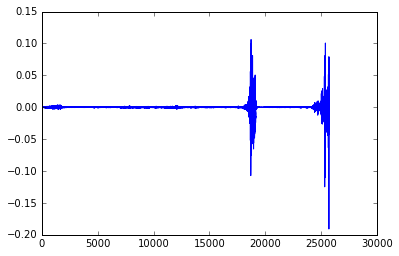

In [8]:
plt.plot(err[T/2:])
plt.figure()